# Modelling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 1. Get Data

In [2]:
# read data
X_train = pd.read_csv("../data/train/features.csv")
y_train = pd.read_csv("../data/train/target.csv")
X_test = pd.read_csv("../data/test/features.csv")
y_test = pd.read_csv("../data/test/target.csv")

## 2. Modelling

In [3]:
classifier = DecisionTreeClassifier(max_depth=3)

In [4]:
# train model
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [5]:
# predict using the model
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

## 3. Model Performance

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

def evaluate(y_true, y_pred):
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)

    print("Accuracy score: ", (tp+tn)/(tn+fp+fn+tp))
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("f1 score: ", f1_score)



In [7]:
print("Evaluation on Training Data")
evaluate(y_train, y_train_pred)

print("\nEvaluation on Testing Data")
evaluate(y_test, y_test_pred)

Evaluation on Training Data
Accuracy score:  0.6237623762376238
Precision:  0.8636363636363636
Recall:  0.35185185185185186
f1 score:  0.5000000000000001

Evaluation on Testing Data
Accuracy score:  0.5686274509803921
Precision:  0.7857142857142857
Recall:  0.36666666666666664
f1 score:  0.5


## 4. Plotting Decision Tree

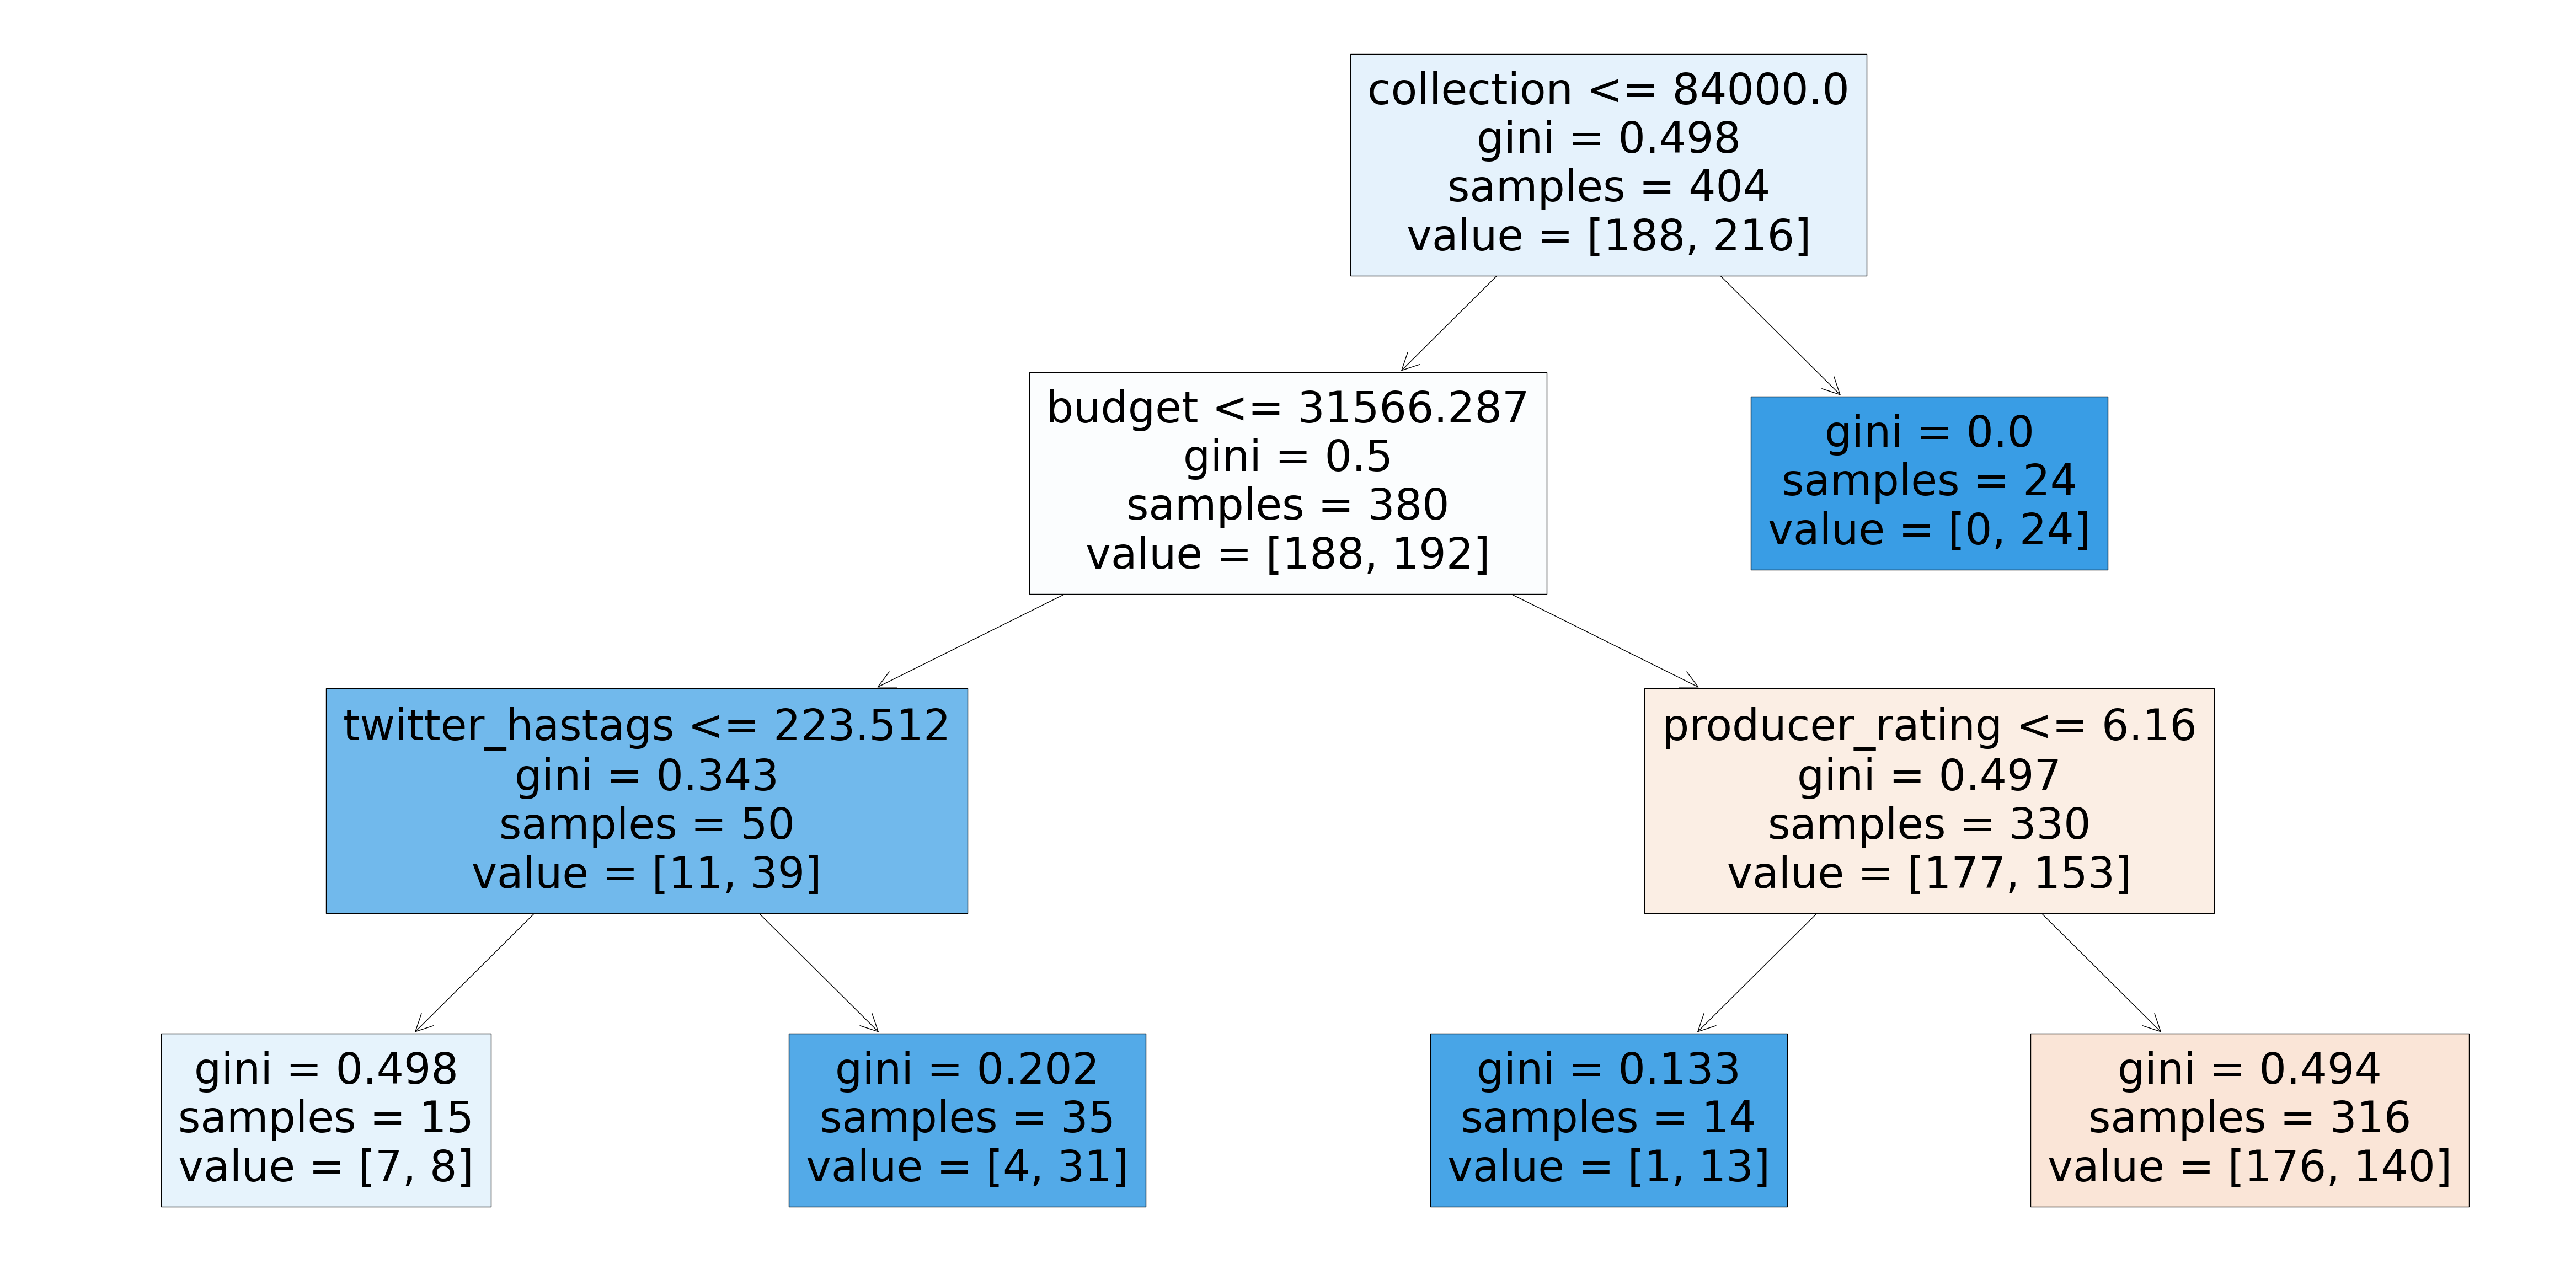

In [8]:
plt.figure(figsize=(60,30))
plot_tree(classifier, feature_names=X_train.columns.to_list(), filled=True);

## 5. Controlling the Decision Tree Growth

### Maximum Depth Tree

Evaluation on Training Data
Accuracy score:  0.6237623762376238
Precision:  0.8636363636363636
Recall:  0.35185185185185186
f1 score:  0.5000000000000001

Evaluation on Testing Data
Accuracy score:  0.5588235294117647
Precision:  0.7777777777777778
Recall:  0.35
f1 score:  0.48275862068965514


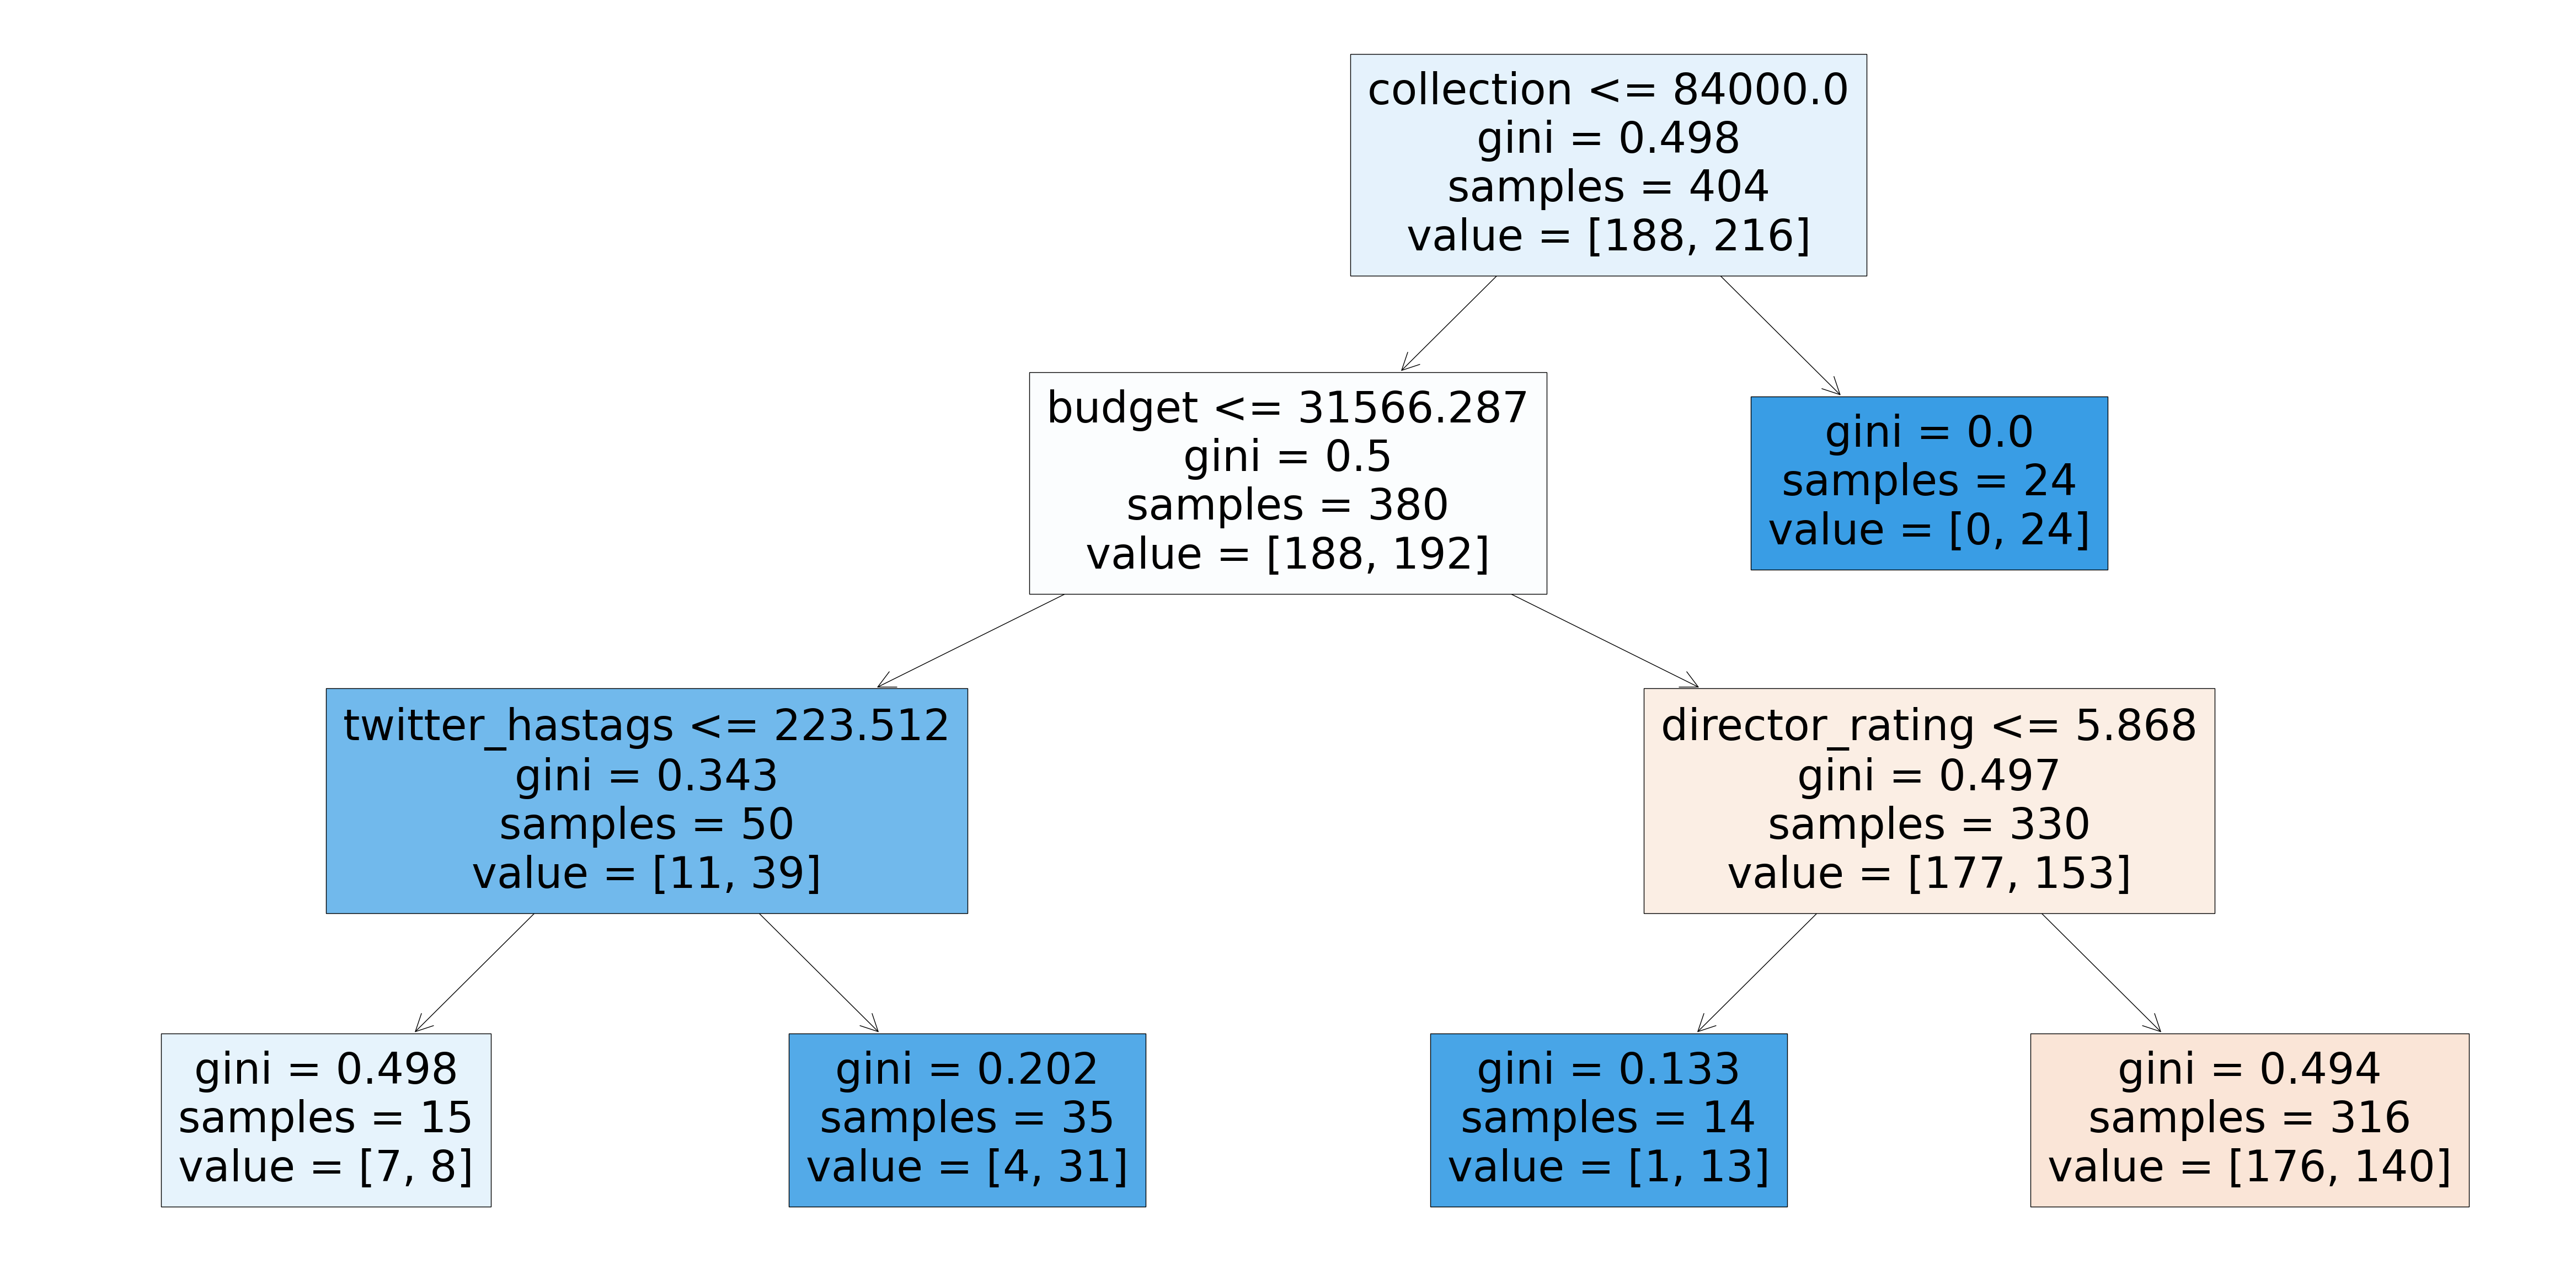

In [76]:
classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

plt.figure(figsize=(60,30))
plot_tree(classifier, feature_names=X_train.columns.to_list(), filled=True);

print("Evaluation on Training Data")
evaluate(y_train, y_train_pred)

print("\nEvaluation on Testing Data")
evaluate(y_test, y_test_pred)

### Minimum Sample at Internal Node

Evaluation on Training Data
Accuracy score:  0.7920792079207921
Precision:  0.7682926829268293
Recall:  0.875
f1 score:  0.8181818181818181

Evaluation on Testing Data
Accuracy score:  0.5784313725490197
Precision:  0.639344262295082
Recall:  0.65
f1 score:  0.6446280991735538


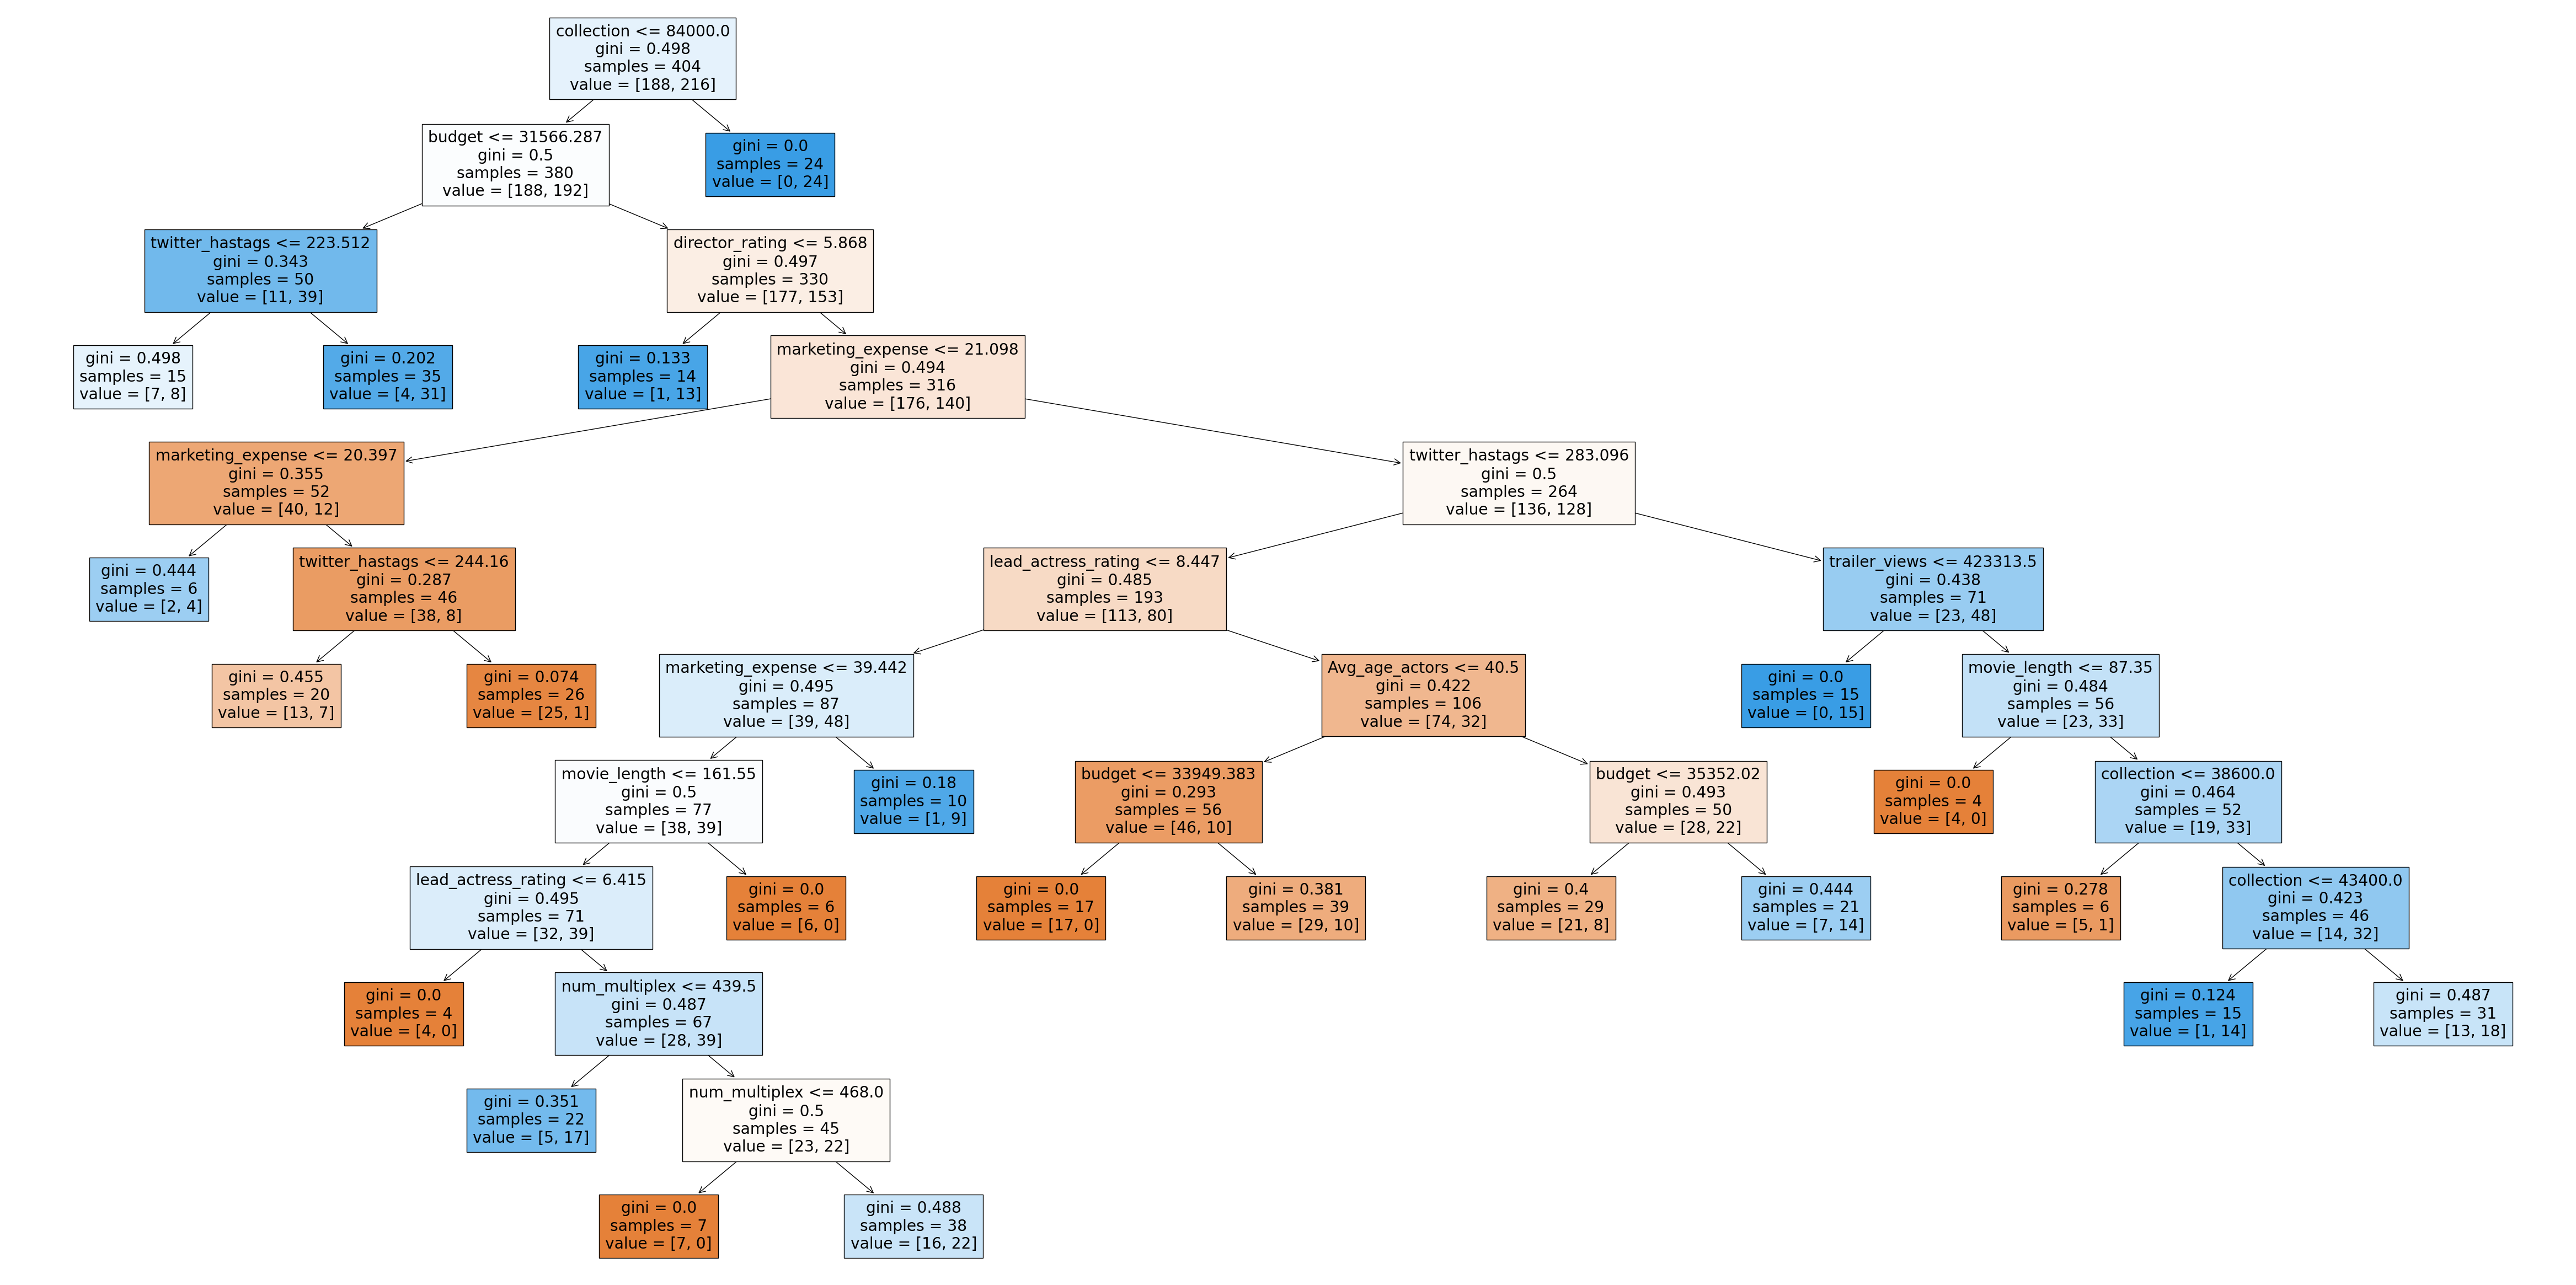

In [74]:
classifier = DecisionTreeClassifier(min_samples_split=40, random_state=42)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

plt.figure(figsize=(60,30))
plot_tree(classifier, feature_names=X_train.columns.to_list(), filled=True);

print("Evaluation on Training Data")
evaluate(y_train, y_train_pred)

print("\nEvaluation on Testing Data")
evaluate(y_test, y_test_pred)

### Minimum Samples at Leaf Node

Evaluation on Training Data
Accuracy score:  0.7202970297029703
Precision:  0.7373271889400922
Recall:  0.7407407407407407
f1 score:  0.7390300230946881

Evaluation on Testing Data
Accuracy score:  0.5784313725490197
Precision:  0.6545454545454545
Recall:  0.6
f1 score:  0.6260869565217392


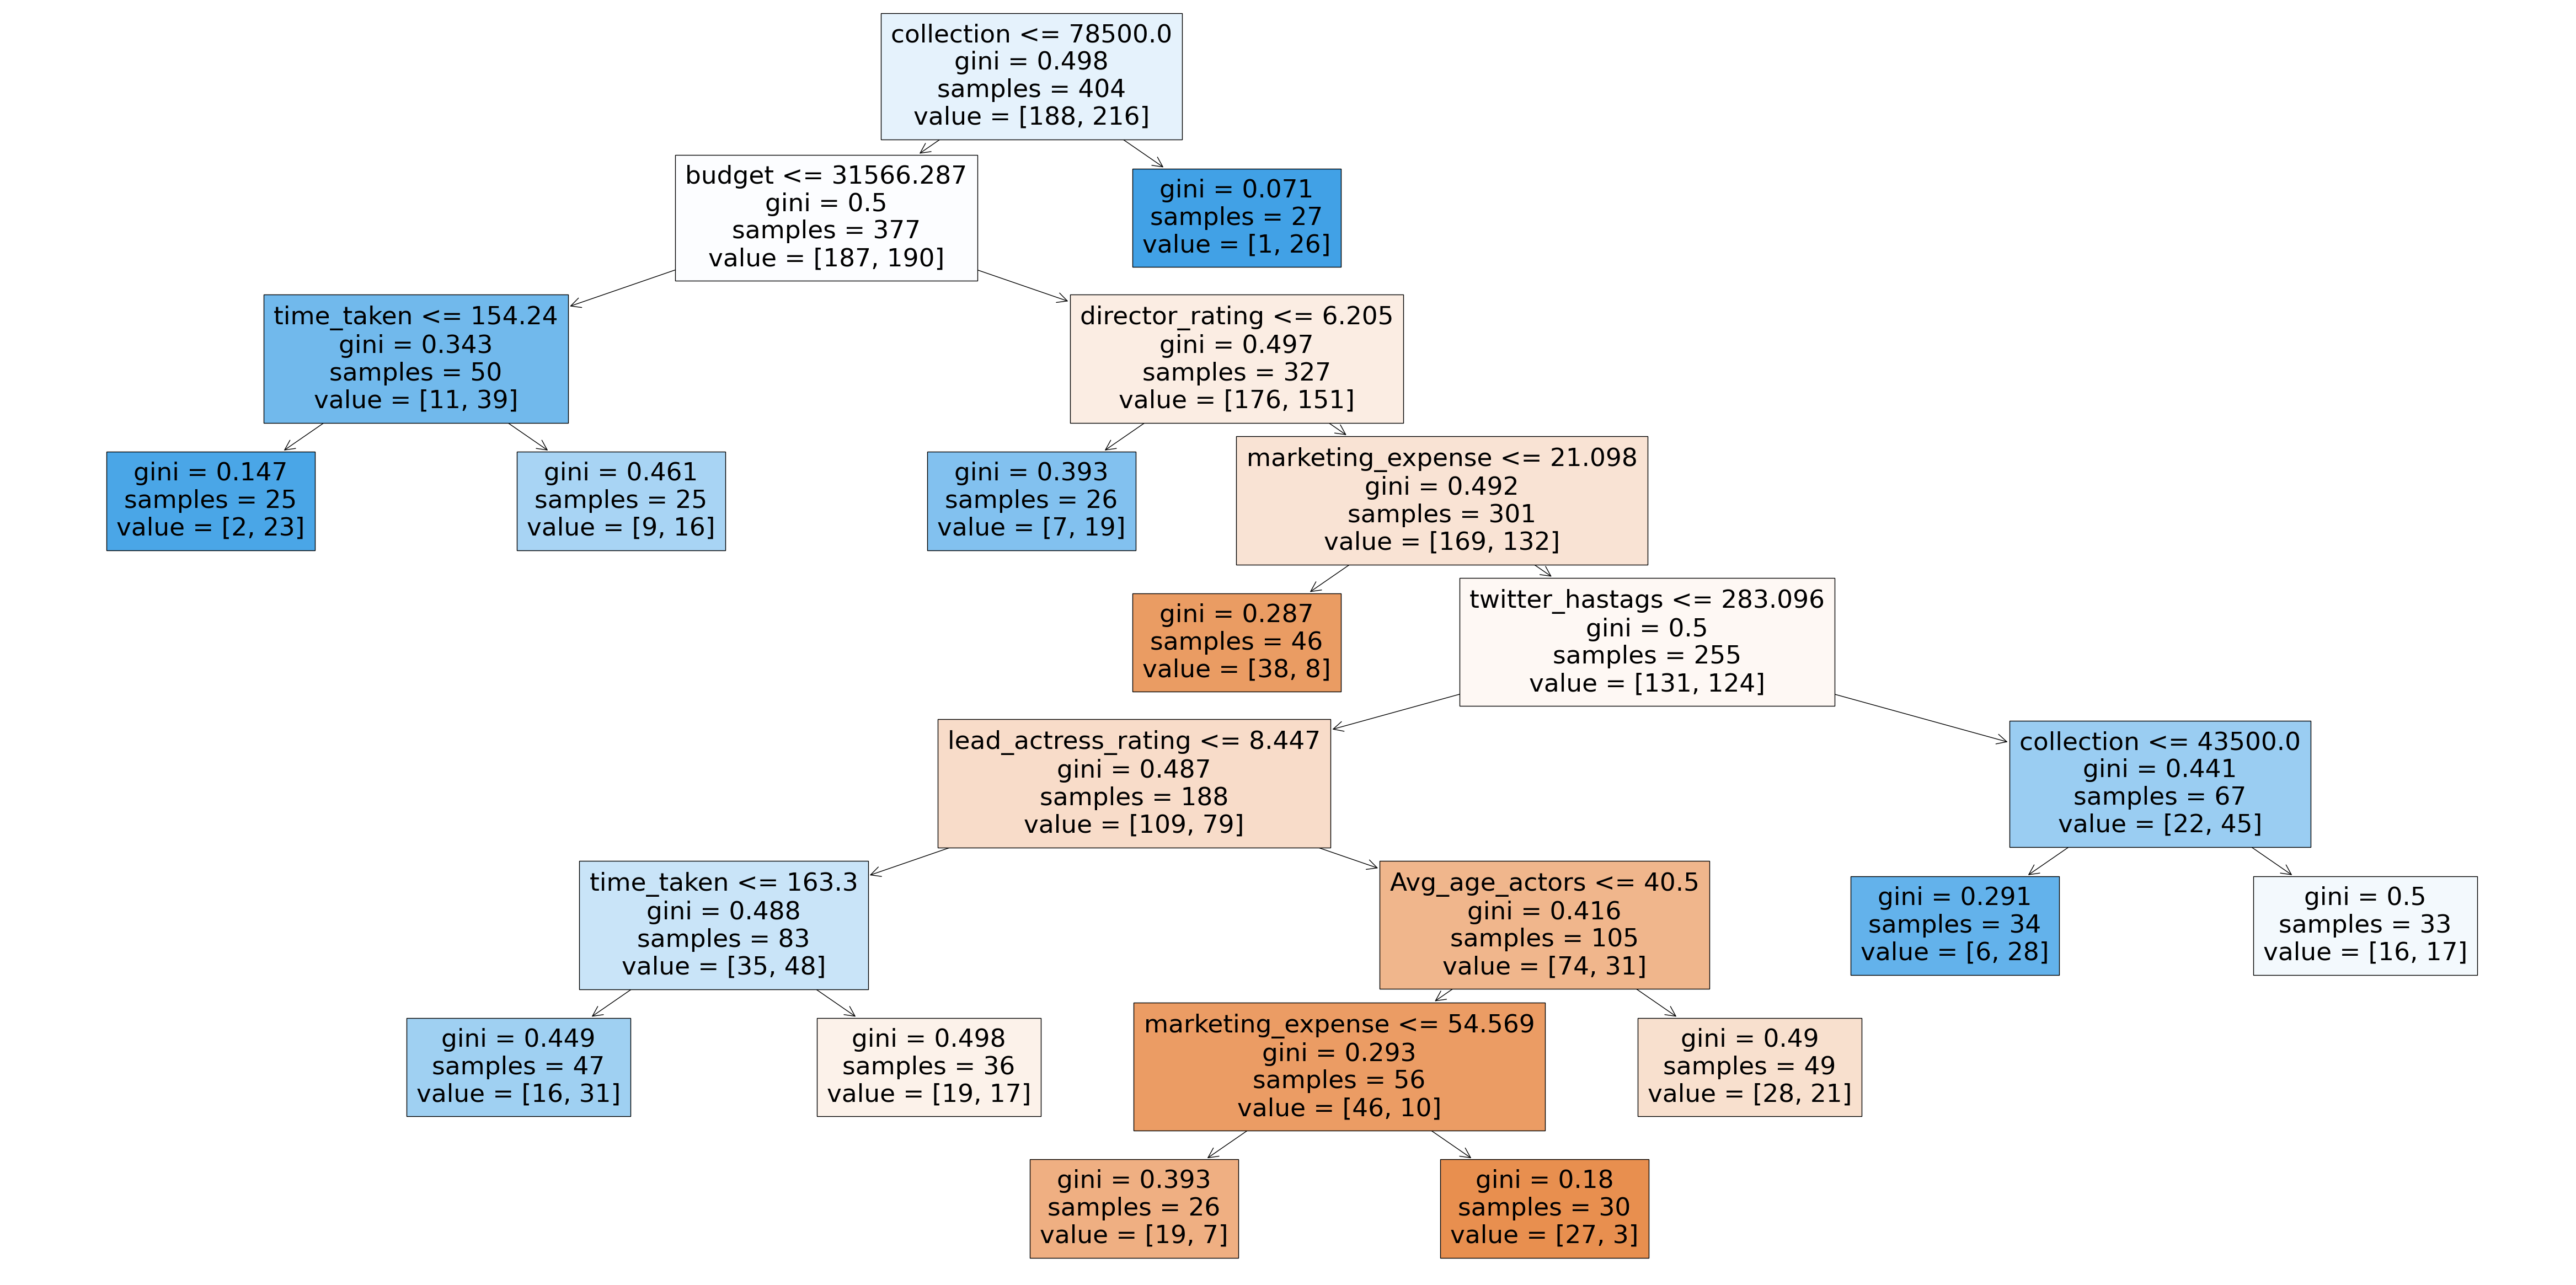

In [75]:
classifier = DecisionTreeClassifier(min_samples_leaf=25, random_state=42)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

plt.figure(figsize=(60,30))
plot_tree(classifier, feature_names=X_train.columns.to_list(), filled=True);

print("Evaluation on Training Data")
evaluate(y_train, y_train_pred)

print("\nEvaluation on Testing Data")
evaluate(y_test, y_test_pred)

However using Decision Tree is prone to Variance

## Bagging

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

classifier = DecisionTreeClassifier()

bag_clf = BaggingClassifier(
    base_estimator=classifier, n_estimators=100,
    bootstrap=True, n_jobs=4,
    random_state=42
)

In [19]:
bag_clf.fit(X_train, y_train)

c:\Users\USER\Documents\GitHub\movie\venv\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\Documents\GitHub\movie\venv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=4, random_state=42)

In [20]:
y_train_pred = bag_clf.predict(X_train)
y_test_pred = bag_clf.predict(X_test)

print("Evaluation on Training Data")
evaluate(y_train, y_train_pred)

print("\nEvaluation on Testing Data")
evaluate(y_test, y_test_pred)

Evaluation on Training Data
Accuracy score:  1.0
Precision:  1.0
Recall:  1.0
f1 score:  1.0

Evaluation on Testing Data
Accuracy score:  0.6372549019607843
Precision:  0.7017543859649122
Recall:  0.6666666666666666
f1 score:  0.6837606837606838


## Random Forest

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifier = DecisionTreeClassifier()

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    bootstrap=True, n_jobs=4,
    random_state=42
)

In [26]:
rf_classifier.fit(X_train, y_train)

c:\Users\USER\Documents\GitHub\movie\venv\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_jobs=4, random_state=42)

In [27]:
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

print("Evaluation on Training Data")
evaluate(y_train, y_train_pred)

print("\nEvaluation on Testing Data")
evaluate(y_test, y_test_pred)

Evaluation on Training Data
Accuracy score:  1.0
Precision:  1.0
Recall:  1.0
f1 score:  1.0

Evaluation on Testing Data
Accuracy score:  0.6470588235294118
Precision:  0.6935483870967742
Recall:  0.7166666666666667
f1 score:  0.7049180327868854
